***
Make sure you download `diamonds.csv` first.



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/CMPT318/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Target class: cut

In [4]:
x = df.drop(["cut"], axis=1)
y = df["cut"]

In [29]:
# TODO: encode the categorical variables!
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
oe = OrdinalEncoder().set_output(transform="pandas")

df["cut"] = le.fit_transform(df["cut"])
df[["color", "clarity"]] = oe.fit_transform(df[["color", "clarity"]])

y = le.fit_transform(df['cut'])
x = df.drop(columns='cut')

x.var()

df.isnull().sum()

df.dropna(inplace=True)
df = df.reset_index(drop=True)
df.shape

x = df.drop(["color", "clarity", "cut"], axis=1)
y = df["cut"]

x.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Question 1:** Perform PCA on the entire dataset with any number of components. How much of the variance is explained by the first component.

In [40]:
# TODO: step 1: PCA
scaler = StandardScaler().set_output(transform="pandas")
scaled_x = scaler.fit_transform(x)

scaled_x.describe().T

from sklearn.decomposition import PCA

principal_components = 2
pca_fitness = PCA(n_components=principal_components)
fitness_component = pca_fitness.fit_transform(x)

principal_fitness_df = pd.DataFrame(data = fitness_component , columns = ['PC 1', 'PC 2'])
principal_fitness_df

print(f'Explained variation per principal component: {pca_fitness.explained_variance_ratio_}')

Explained variation per principal component: [9.99999514e-01 3.27544496e-07]


**Question 2:**
Standardize the dataset and perform the PCA again with the same number of components as question 1

Principal Component Loadings:
        PC1 Loading  PC2 Loading
carat     0.000110     0.012681
depth    -0.000004    -0.285525
table     0.000071     0.956298
price     1.000000    -0.000093
x         0.000249     0.044506
y         0.000248     0.041736
z         0.000152     0.009328
Explained variation per principal component: [9.99999514e-01 3.27544496e-07]


<Axes: xlabel='PC 2', ylabel='PC 1'>

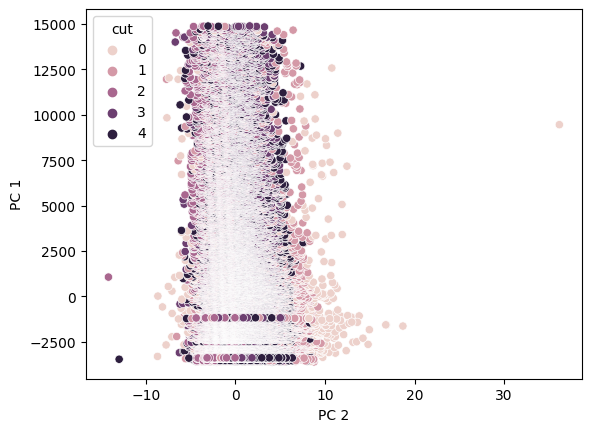

In [50]:
# TODO: step 2: standardize the data and perform PCA

principal_fitness_df = pd.DataFrame(data = fitness_component , columns = ['PC 1', 'PC 2'])
principal_fitness_df

loadings = pca_fitness.components_

loadings_df = pd.DataFrame(data=loadings.T, columns=['PC1 Loading', 'PC2 Loading'], index=scaled_x.columns)
print("Principal Component Loadings:\n",loadings_df)

print(f'Explained variation per principal component: {pca_fitness.explained_variance_ratio_}')

data = pd.concat([principal_fitness_df, y], axis=1)
data

sns.scatterplot(data=data, x="PC 2", y="PC 1", hue="cut")

**Question 3:** Is there a difference between the standardized and non-standardized PCA results? Explain the difference you observe

In [58]:
# TODO: answer:
"""
There does not seem to too much of a difference between
the standardized and non-standardized PCA results.
As the numbers are both the same, and there is no change.
"""

'\nThere does not seem to too much of a difference between \nthe standardized and non-standardized PCA results. \nAs the numbers are both the same, and there is no change. \n'

**Question 4:** Using K-means, cluster the data(dimension reduced data) from question 2.

<Axes: xlabel='PC 2', ylabel='PC 1'>

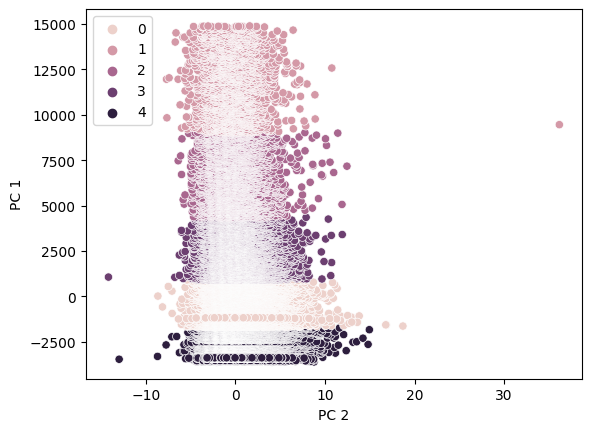

In [57]:
# TODO: step 4: clustering
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    silhouette_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    train_test_split,
)

data = pd.concat([principal_fitness_df, y], axis=1)
data

kmeans = KMeans(n_clusters=5, random_state=123, n_init="auto")
kmeans.fit(data)

sns.scatterplot(
    data=data, x="PC 2", y="PC 1", hue=kmeans.labels_
)


**Question 5:** What do you observe in your clustering?

In [61]:
# TODO: answer:
"""
Using K-means clustering, we can see the clusters that have formed.
We can now clearly see the difference in those clusters. In the previous
scatterplot, we couldn't differeniate between each cluster, but in this
scatterplot, we are able to separate each cluster. This scatterplot has a
similar shape, but we can see clear boundaries between clusters.
"""

"\nUsing K-means clustering, we can see the clusters that have formed. \nWe can now clearly see the difference in those clusters. In the previous \nscatterplot, we couldn't differeniate between each cluster, but in this \nscatterplot, we are able to separate each cluster. This scatterplot has a \nsimilar shape, but we can see clear boundaries between clusters. \n"